In [2]:
from google.colab import files
  
  
uploaded = files.upload()

Saving day.csv to day.csv


**Importing libraries for use in this case study and supressing the warning**

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
# Reading the dataset

Boom_bike = pd.read_csv("day.csv")

#**Step 1: Data Exploration**

In [6]:
# Checking the first ten data

Boom_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [7]:
## Checking the Dataset shape

Boom_bike.shape

(730, 16)

In [8]:
# Check the null values in columns have

Boom_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Check datatype

Boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Checking the mean, 50% avg, etc.

Boom_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


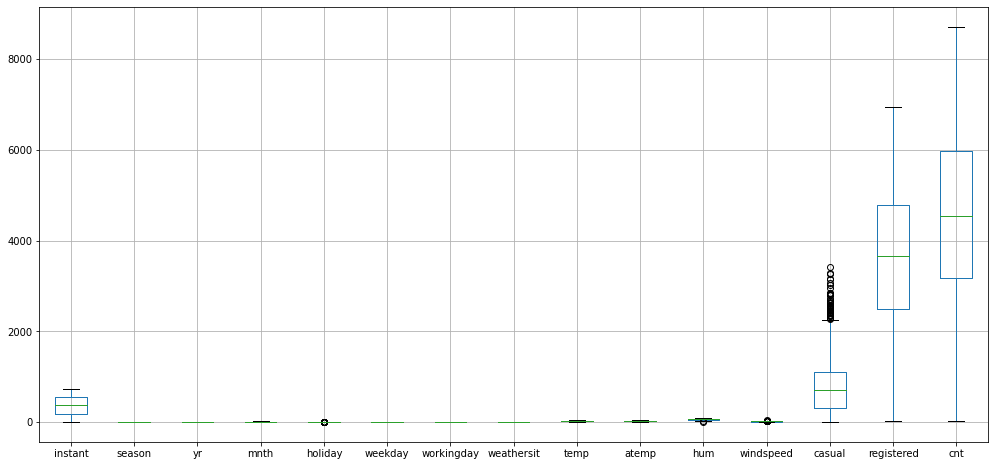

In [11]:
# Checking the Outliers

plt.figure(figsize = (17, 8))   
Boom_bike.boxplot()
plt.show()

**For above graph there are no too much outliers in this Dataset but we can see outliers in casual column but casual and register both data is in cnt column that's the resion next step we remove that columns and other data has not any outlies.**

In [12]:
# Here we dropping some unusefull column and check dataset

Boom_bike.drop(["instant", "casual", "registered", "dteday"], axis=1, inplace=True)
Boom_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Above we Drop the four column 
1. --> instant ==> Because of it just an index we don't need.
2. --> casual and registered ==> Because of  'cnt' variable indicates the total number of bike rentals, including both casual and registered. And "cnt" is also our target veriable.
3. --> dteday ==> Because we also have month and year column in dataset

#**Step 2: Visualising the data**

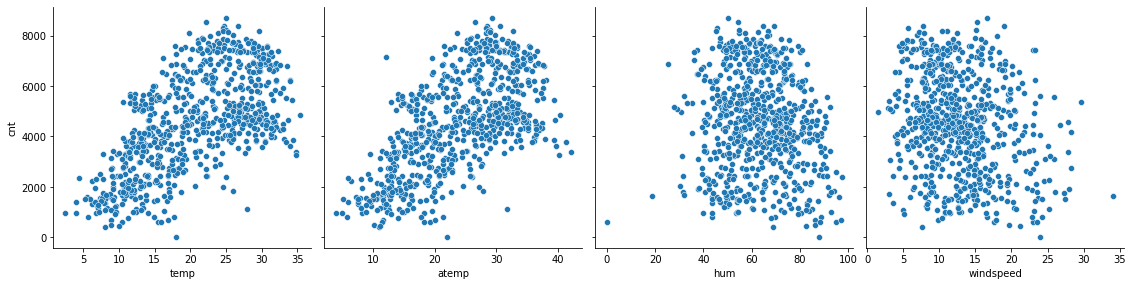

In [13]:
#Visualising the numeric variables

sns.pairplot(Boom_bike, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

<Figure size 1080x720 with 0 Axes>

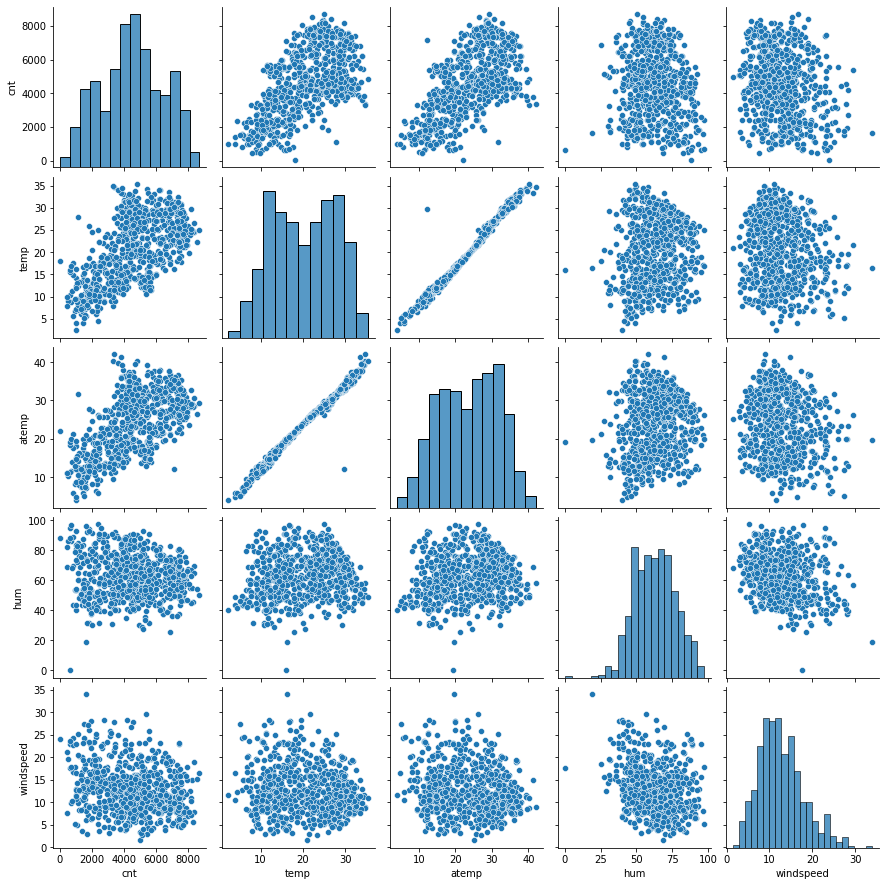

In [14]:
# Just looking all numeric pairplot 

plt.figure(figsize= (15, 10))
sns.pairplot(data=Boom_bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

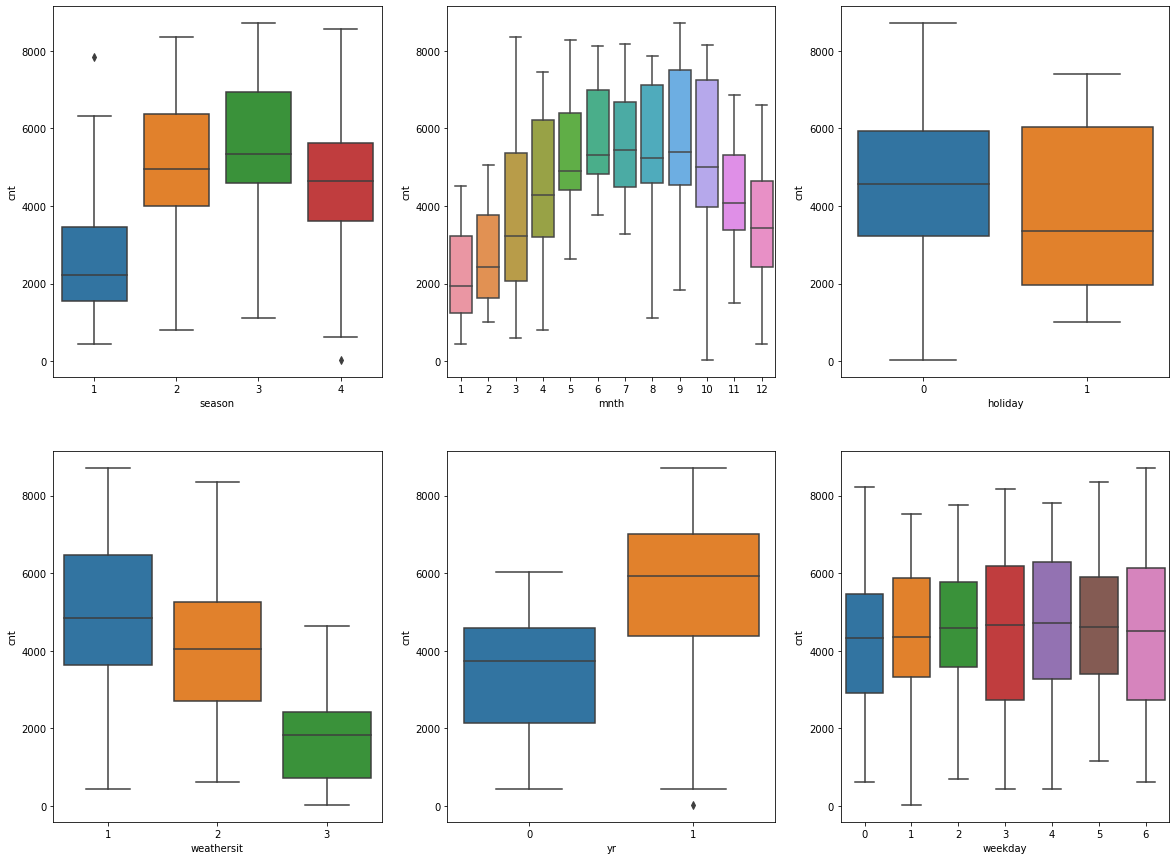

In [15]:
# Visualising the categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Boom_bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Boom_bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = Boom_bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Boom_bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = Boom_bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Boom_bike)
plt.show()

#**Step 3: Data Preparation**

In [16]:
# Here we check the uniqe values
Boom_bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

 **Above we have some column have some unique values like**
1. - **season** : season represent (1:spring, 2:summer, 3:fall, 4:winter)
2. - **yr** : year represent (0: 2018, 1:2019)
3. - **mnth** : month represent ( 1 to 12 month name)
4. - **weathersit** : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
5. - **weekday** : day of the week

so here we need to change numeric values convert into categorical string values
for more clear about data

In [17]:
#Here we convert "mnth" numeric values into categorical string values using map() function

Boom_bike['mnth'] = Boom_bike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
Boom_bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [18]:
#Here we convert "season" numeric values into categorical string values using map() function

Boom_bike['season'] = Boom_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
Boom_bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [19]:
#Here we convert "weekday" numeric values into categorical string values using map() function

Boom_bike['weekday'] = Boom_bike.weekday.map({0:'sun', 1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
Boom_bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [20]:
#Here we convert "weathersit" numeric values into categorical string values using map() function

Boom_bike['weathersit'] = Boom_bike.weathersit.map({1:'clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})
Boom_bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349


**Above We Visualising the dataset we can show some point**
- In season we can see at ("3") **"fall"** season is mostly bike share is more use than other season and less use in ("1") **"spring"** season.
- In Months we can see at ("8","9","10") **Aug, sep, oct** this three months have more bike share and ("1","2")  **Jan, Feb** is less use of bike share.
- In Weathersit we can see at ("1") **Clear** this Weathersit have more bike share and ("3","4")  **Light_Snow, Heavy_Rain** is less use of bike share.
- In Weekday we can see at ("4") **Thu** this Weekday have more bike share and ("0")  **Sun** is less use of bike share.
- In year we can see at ("1") **2019** this year have more bike share and ("0")  **2018** is less use of bike share.

**Now let's compare the some column data to year wise for better understanding** 

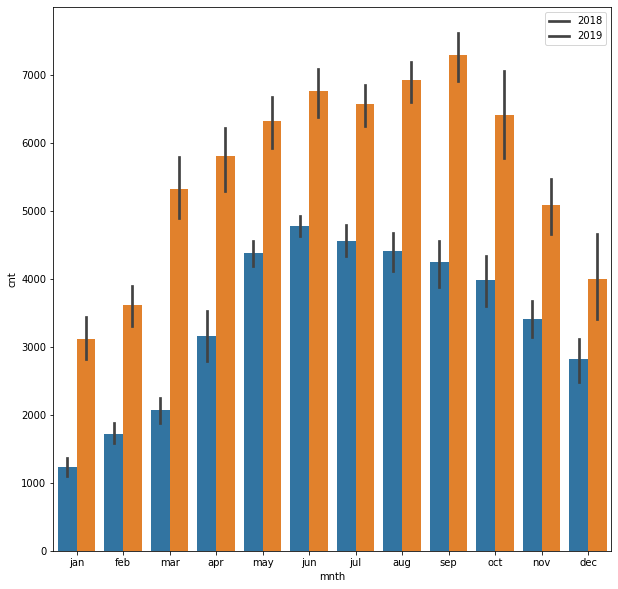

In [21]:
plt.figure(figsize = (10,10))
sns.barplot(x='mnth', y='cnt', data=Boom_bike, hue='yr')
plt.legend(labels=['2018','2019'])
plt.show()

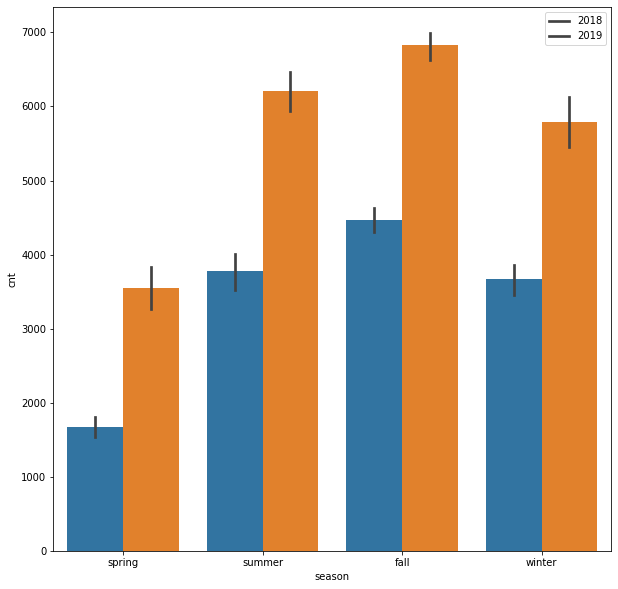

In [22]:
plt.figure(figsize = (10,10))
sns.barplot(x='season', y='cnt', data=Boom_bike, hue='yr')
plt.legend(labels=['2018','2019'])
plt.show()

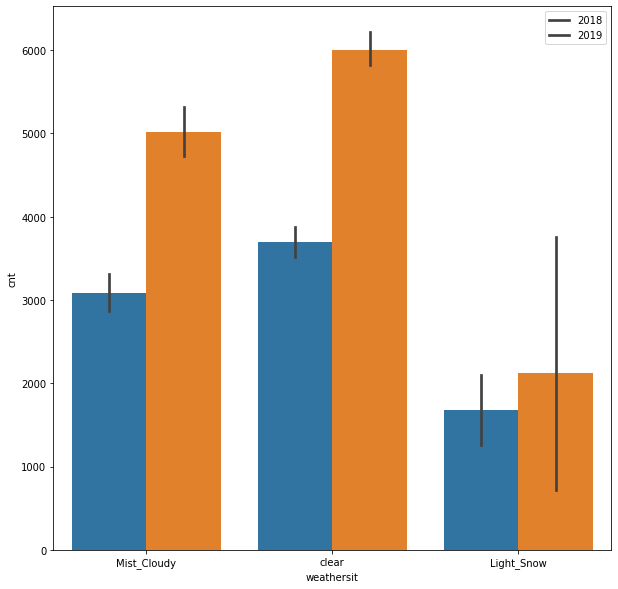

In [23]:
plt.figure(figsize = (10,10))
sns.barplot(x='weathersit', y='cnt', data=Boom_bike, hue='yr')
plt.legend(labels=['2018','2019'])
plt.show()

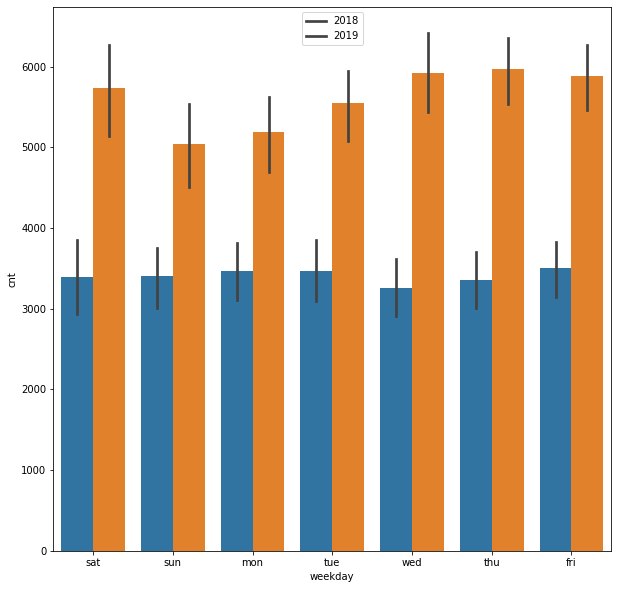

In [24]:
plt.figure(figsize = (10,10))
sns.barplot(x='weekday', y='cnt', data=Boom_bike, hue='yr')
plt.legend(labels=['2018','2019'])
plt.show()

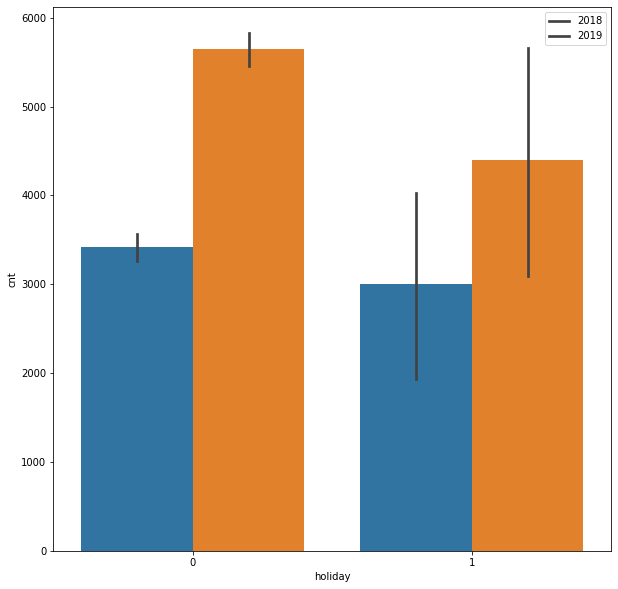

In [25]:
plt.figure(figsize = (10,10))
sns.barplot(x='holiday', y='cnt', data=Boom_bike, hue='yr')
plt.legend(labels=['2018','2019'])
plt.show()

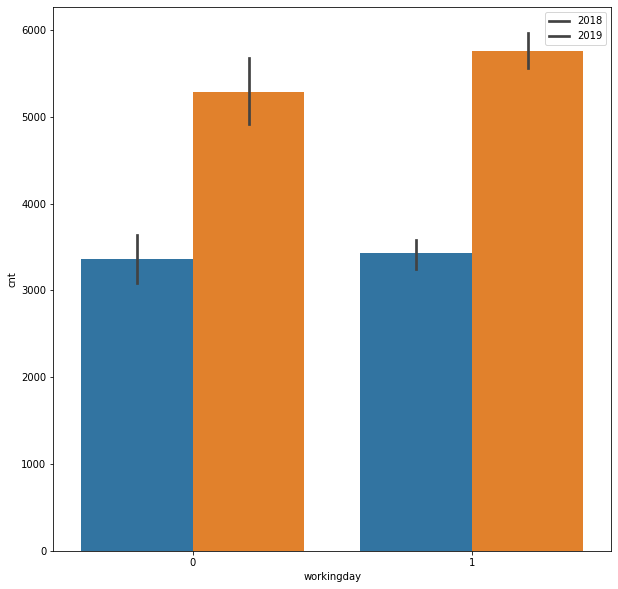

In [26]:
plt.figure(figsize = (10,10))
sns.barplot(x='workingday', y='cnt', data=Boom_bike, hue='yr')
plt.legend(labels=['2018','2019'])
plt.show()

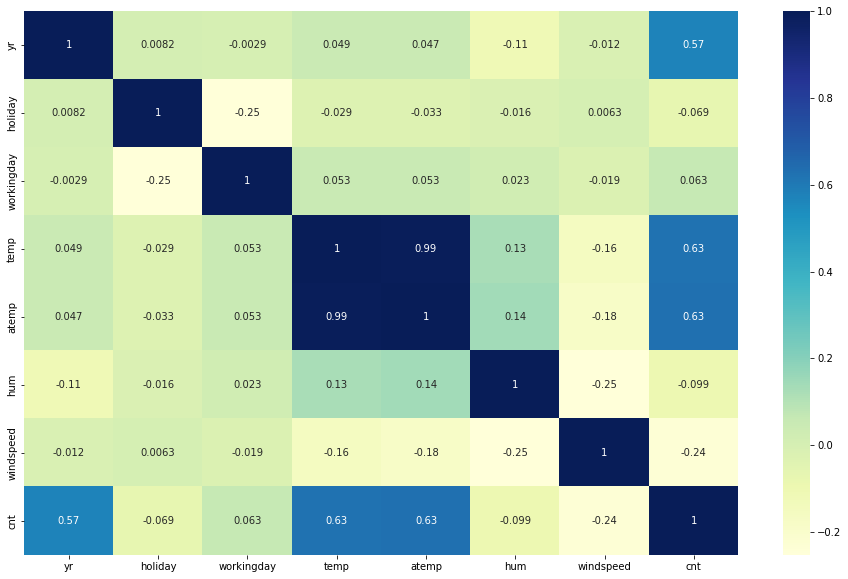

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(Boom_bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see above heatmap there are some highly correlated variable with our target variable like **yr, temp, atemp, windspeed** for this variable we check regression plot for understand.
- above we can display only **temp** plot because of temp and atemp are all most same because both are highly corelated with each other above heatmap show 0.99 correlation between them.
- we also show cnt vs windspeed plot because it's negatively corelation with cnt. 

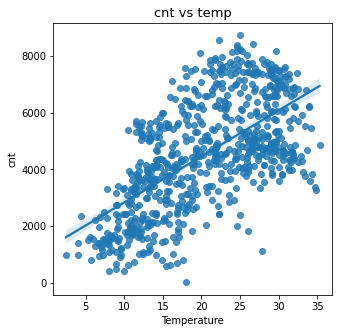

In [28]:
plt.figure(figsize=(5,5))
plt.title('cnt vs temp', fontsize=13)
sns.regplot(data=Boom_bike,x='temp', y='cnt')
plt.xlabel('Temperature')
plt.show()

Here we see above plot bike share demand is positvely correlated to temp and we can also see that cnt is increasing with temp indicating a linear relationship.

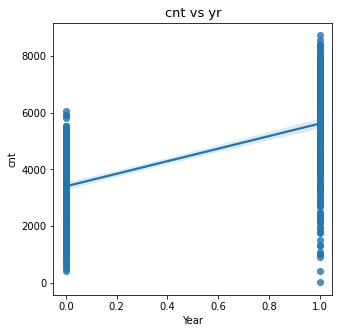

In [29]:
plt.figure(figsize=(5,5))
plt.title('cnt vs yr', fontsize=13)
sns.regplot(data=Boom_bike,x='yr', y='cnt')
plt.xlabel('Year')
plt.show()

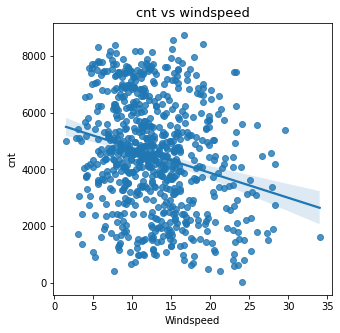

In [30]:
plt.figure(figsize=(5,5))
plt.title('cnt vs windspeed', fontsize=13)
sns.regplot(data=Boom_bike,x='windspeed', y='cnt')
plt.xlabel('Windspeed')
plt.show()

We can see Windespeed is increase than cnt is decrease that's the reason bike share demand is decrease cnt negatively corelated with windspeed

#**Dummy Variables Create**

In [31]:
#here we creating dummy variables for season , mnth ,weathersit ,weekday
dummy_var = Boom_bike[['season','mnth','weekday','weathersit']]

In [32]:
dummy_var = pd.get_dummies(dummy_var,drop_first=True )
dummy_var.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [33]:
# Now we add this dummy variable into our actual dataset

Boom_bike = pd.concat([dummy_var,Boom_bike],axis = 1)
Boom_bike.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
# Now we are going to remove our this four column we use to create a dummy data

Boom_bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
Boom_bike.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
Boom_bike.shape

(730, 30)

#**Step 4: Now splitting the Data into Training and Testing dataset**

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(Boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
#Checking the train data

df_train.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


#**Step 5: Rescaling the Features**

In [38]:
scaler = MinMaxScaler()

In [39]:
# Apply scaler() to all the columns except the 'Binary value' and 'dummy' variables
num_vars = ['cnt','hum','windspeed','temp','atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head(7)

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095
580,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559


In [41]:
df_train.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.627451,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.483958,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Above we can see all column max value is 1.00**

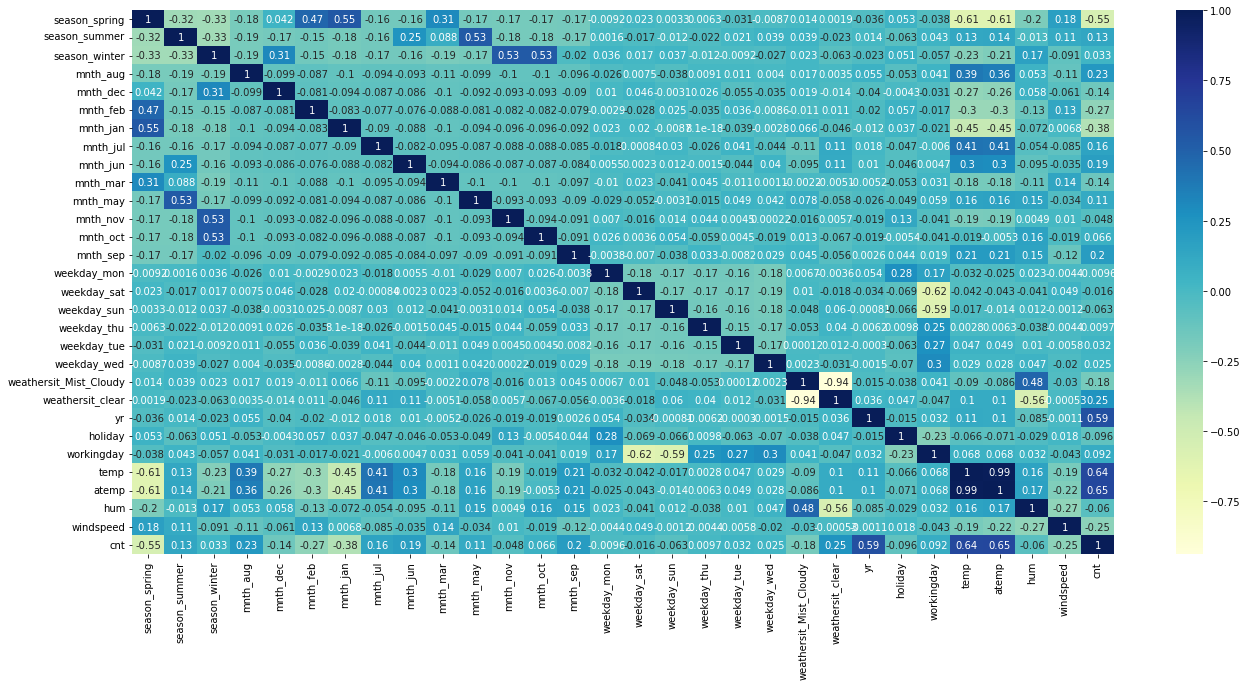

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**As you might have noticed, atemp seems to the correlated to cnt the most. Let's see a pairplot for atemp vs cnt.**

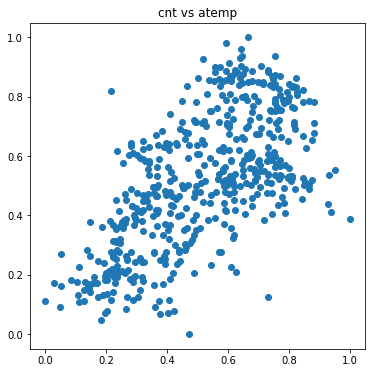

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(df_train["atemp"], df_train['cnt'])
plt.title("cnt vs atemp")
plt.show()

**Dividing into X and y sets for the model building**

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

#**Step 6: Building a linear model**

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

#**Model 1:**

In [45]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 13)           # running RFE
rfe = rfe.fit(X_train,y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', False, 3),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 3),
 ('mnth_sep', False, 2),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 3),
 ('weathersit_Mist_Cloudy', True, 1),
 ('weathersit_clear', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [47]:
# here we print the RFE suggest the columns

col = X_train.columns[rfe.support_]
col

Index(['season_winter', 'mnth_jan', 'mnth_jul', 'weekday_sat', 'weekday_sun',
       'weathersit_Mist_Cloudy', 'weathersit_clear', 'yr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

**Building model using statsmodel, for the detailed statistics**

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
# let's Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [52]:
# Check the parameters obtained
lm.params

const                    -0.021420
season_winter             0.095249
mnth_jan                 -0.066444
mnth_jul                 -0.094366
weekday_sat               0.039178
weekday_sun              -0.015907
weathersit_Mist_Cloudy    0.189443
weathersit_clear          0.242491
yr                        0.228903
holiday                  -0.073779
workingday                0.029089
temp                      0.513249
atemp                     0.096838
hum                      -0.147355
windspeed                -0.187622
dtype: float64

In [53]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.90e-179
Time:                        07:23:32   Log-Likelihood:                 486.01
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

**Here we need to check atemp and weekday_sun VIF values because this p-value is >0.05**

#**Checking VIF**

In [54]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,weekday_sat,inf
5,weekday_sun,inf
9,holiday,inf
10,workingday,inf
12,atemp,51.65
11,temp,51.59
7,weathersit_clear,10.27
6,weathersit_Mist_Cloudy,8.89
13,hum,1.90
2,mnth_jan,1.46


**Above VIF data we can see atemp has high value so first we drop a atemp from datafream because we generally want a VIF that is less than 5. So there are clearly some variables we need to drop.**

In [55]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

#**Model 2:**

In [56]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [57]:
# let's Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [58]:
# let's check our new model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.66e-180
Time:                        07:23:32   Log-Likelihood:                 485.77
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     497   BIC:                            -890.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [59]:
# Here "weekday_sun" have a high p value so let's drop it
X_train_new = X_train_new.drop(["weekday_sun"], axis = 1)

#**Model 3:**

In [60]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [61]:
#let's Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.66e-180
Time:                        07:23:32   Log-Likelihood:                 485.77
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     497   BIC:                            -890.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

**Checking VIF**

In [63]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,127.85
6,weathersit_clear,10.20
5,weathersit_Mist_Cloudy,8.84
10,temp,1.97
11,hum,1.89
9,workingday,1.88
4,weekday_sat,1.78
2,mnth_jan,1.45
1,season_winter,1.29
3,mnth_jul,1.26


In [64]:
# now we need to drop "weathersit_clear" because it has a high VIF value
X_train_new = X_train_new.drop(["weathersit_clear"], axis = 1)

#**Model 4:**

In [65]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [66]:
# Run the model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     180.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.24e-166
Time:                        07:23:32   Log-Likelihood:                 448.65
No. Observations:                 510   AIC:                            -873.3
Df Residuals:                     498   BIC:                            -822.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [68]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.01
9,temp,1.94
8,workingday,1.87
4,weekday_sat,1.77
10,hum,1.59
2,mnth_jan,1.45
5,weathersit_Mist_Cloudy,1.39
1,season_winter,1.29
3,mnth_jul,1.25
7,holiday,1.16


In [69]:
# "holiday" need to be remove because it has a high p value
X_train_new = X_train_new.drop(["holiday"], axis = 1)

#**Model 5:**

In [70]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [71]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [72]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.87e-166
Time:                        07:23:32   Log-Likelihood:                 446.97
No. Observations:                 510   AIC:                            -871.9
Df Residuals:                     499   BIC:                            -825.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [73]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.66
8,temp,1.94
7,workingday,1.64
4,weekday_sat,1.63
9,hum,1.59
2,mnth_jan,1.45
5,weathersit_Mist_Cloudy,1.39
1,season_winter,1.29
3,mnth_jul,1.25
10,windspeed,1.14


In [74]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [75]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,17.65
7,temp,11.44
6,workingday,4.58
9,windspeed,3.64
5,yr,2.04
4,weathersit_Mist_Cloudy,1.98
3,weekday_sat,1.80
0,season_winter,1.68
1,mnth_jan,1.44
2,mnth_jul,1.36


In [76]:
# 'hum' have a high VIF value so we are going to remove this
X_train_new = X_train_new.drop(['hum'], axis=1)

In [77]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()  

#**Model 6:**

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.11e-157
Time:                        07:23:32   Log-Likelihood:                 421.59
No. Observations:                 510   AIC:                            -823.2
Df Residuals:                     500   BIC:                            -780.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [79]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,5.65
6,workingday,4.26
8,windspeed,3.40
5,yr,2.04
3,weekday_sat,1.74
4,weathersit_Mist_Cloudy,1.52
0,season_winter,1.32
2,mnth_jul,1.32
1,mnth_jan,1.24


#**Step 7: Residual Analysis of the train data**
here we need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see how it's looks like.

In [80]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

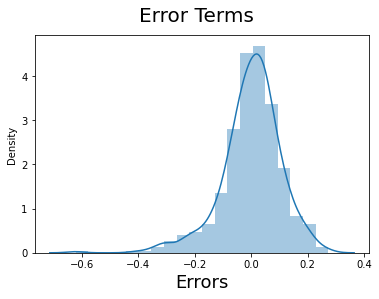

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Above we can see the plot is normaly distributed**

#**Step 8: Make predictions using the our final model**

In [82]:
#Applying the scaling on the test sets
num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [83]:
#let's check our test data
df_test.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist_Cloudy,weathersit_clear,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.652968,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.477117,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


**Let's divide our data into X_test and y_test**

In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [86]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   219 non-null    float64
 1   season_winter           219 non-null    uint8  
 2   mnth_jan                219 non-null    uint8  
 3   mnth_jul                219 non-null    uint8  
 4   weekday_sat             219 non-null    uint8  
 5   weathersit_Mist_Cloudy  219 non-null    uint8  
 6   yr                      219 non-null    int64  
 7   workingday              219 non-null    int64  
 8   temp                    219 non-null    float64
 9   windspeed               219 non-null    float64
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [87]:
# Making predictions our
y_pred = lm.predict(X_test)

In [88]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1091853418392832

In [89]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7490001889253041

**Check this r_squared value and compare with our final model r_squared value both are near with each other**

#**Step 9: Model Evaluation**

**Let's check plot graph for actual predicted values**

Text(0, 0.5, 'y_pred')

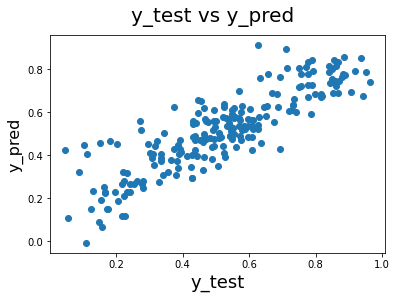

In [90]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [91]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
8,temp,0.579954
6,yr,0.238236
0,const,0.116081
1,season_winter,0.074051
4,weekday_sat,0.059697
7,workingday,0.048193
5,weathersit_Mist_Cloudy,-0.063213
2,mnth_jan,-0.067253
3,mnth_jul,-0.087679


**We can see that the equation of our best fitted line is:**

**cnt = 0.116081 + 0.579954 X temp + 0.238236 X yr + 0.074051 X season_winter + 0.059697 X weekday_sat + 0.048193 X workingday - 0.063213 X weathersit_Mist_Cloudy - 0.067253 X mnth_jan - 0.087679 X mnth_jul - 0.190149 X windspeed**

**Overall we have a decent model, but we also acknowledge that we could do better.**

▶ company needs to foucs to more improvement on january, july month.